In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../experiment_results/Topology_size/results.csv')

In [4]:
df

,backend,backend_size,code,decoder,distance,cycles,num_samples,error_type,error_probability,logical_error_rate,layout_method,routing_method,translating_method
0,custom_full,300,surface,bposd,11,1,10000,pm3,0.0001,0.0000,NaN,NaN,NaN
1,custom_full,300,surface,bposd,11,1,10000,sd6,0.0010,0.0000,NaN,NaN,NaN
2,custom_full,300,surface,bposd,11,1,10000,pm3,0.0010,0.0000,NaN,NaN,NaN
3,custom_full,300,surface,bposd,11,1,10000,sd6,0.0001,0.0000,NaN,NaN,NaN
4,custom_full,300,surface,bposd,11,1,10000,pm3,0.0001,0.0000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
315,custom_full,500,bacon,bposd,21,1,10000,sd6,0.1000,0.5029,NaN,NaN,NaN
316,custom_full,500,steane,bposd,9,1,10000,pm3,0.0010,0.0368,NaN,NaN,NaN
317,custom_full,500,bacon,bposd,21,1,10000,pm3,0.1000,0.5001,NaN,NaN,NaN
318,custom_full,500,steane,bposd,9,1,10000,sd6,0.0100,0.2726,NaN,NaN,NaN


In [5]:
import matplotlib.pyplot as plt

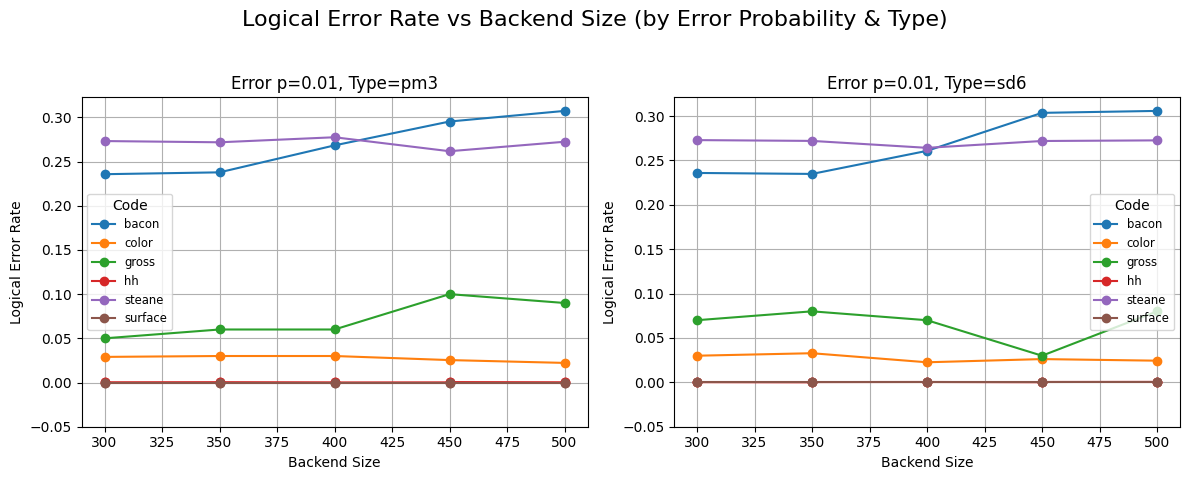

In [6]:
# import matplotlib.pyplot as plt

# Define the combinations
error_probs = [0.01]
error_types = ['pm3', 'sd6']
combinations = [(p, et) for p in error_probs for et in error_types]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

for i, (p, et) in enumerate(combinations):
    ax = axes[i]
    subset = df[(df['error_probability'] == p) & (df['error_type'] == et)]
    
    for code, group in subset.groupby('code'):
        ax.plot(group['backend_size'], group['logical_error_rate'], label=code, marker='o')
    
    ax.set_title(f'Error p={p}, Type={et}')
    ax.set_ylim(bottom=-0.05)
    ax.set_xlabel('Backend Size')
    ax.set_ylabel('Logical Error Rate')
    ax.grid(True)
    ax.legend(title='Code', fontsize='small')

# Set overall title
fig.suptitle('Logical Error Rate vs Backend Size (by Error Probability & Type)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("../data/Topology_size/size.png")

In [ ]:
df1 = pd.read_csv('../experiment_results/Topology_connectivity/results.csv')
s = [df1['code'] == "surface"]
s

0       True
1       True
2       True
3       True
4       True
       ...  
155    False
156    False
157    False
158    False
159    False
Name: code, Length: 160, dtype: bool

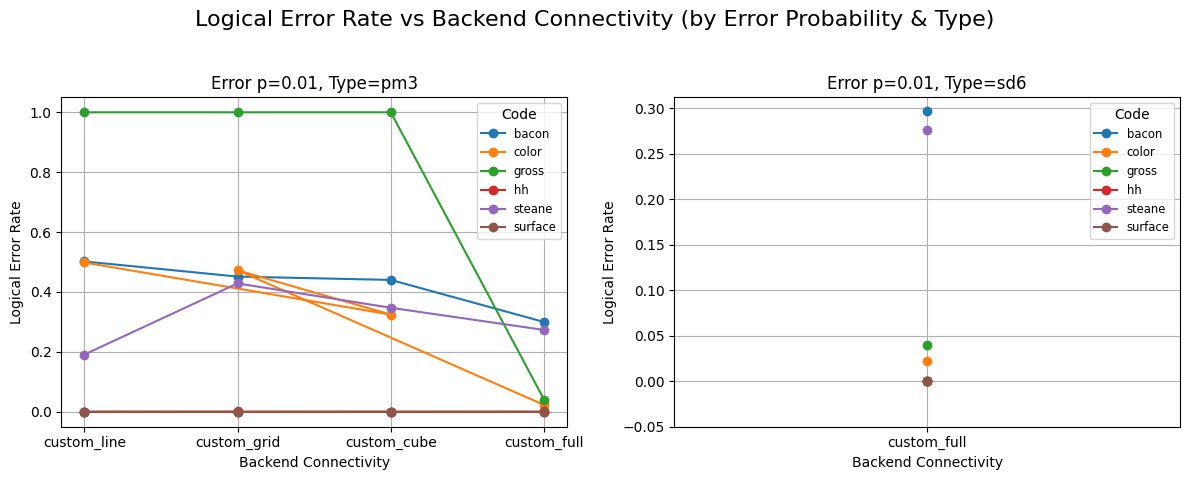

In [11]:
# import matplotlib.pyplot as plt

# Define the combinations
error_probs = [0.01]
error_types = ['pm3', 'sd6']
combinations = [(p, et) for p in error_probs for et in error_types]

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
axes = axes.flatten()

for i, (p, et) in enumerate(combinations):
    ax = axes[i]
    subset = df1[(df1['error_probability'] == p) & (df1['error_type'] == et)]
    
    for code, group in subset.groupby('code'):
        ax.plot(group['backend'], group['logical_error_rate'], label=code, marker='o')
    
    ax.set_title(f'Error p={p}, Type={et}')
    ax.set_ylim(bottom=-0.05)
    ax.set_xlabel('Backend Connectivity')
    ax.set_ylabel('Logical Error Rate')
    ax.grid(True)
    ax.legend(title='Code', fontsize='small')

# Set overall title
fig.suptitle('Logical Error Rate vs Backend Connectivity (by Error Probability & Type)', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("../data/Topology_connectivity/size.png")

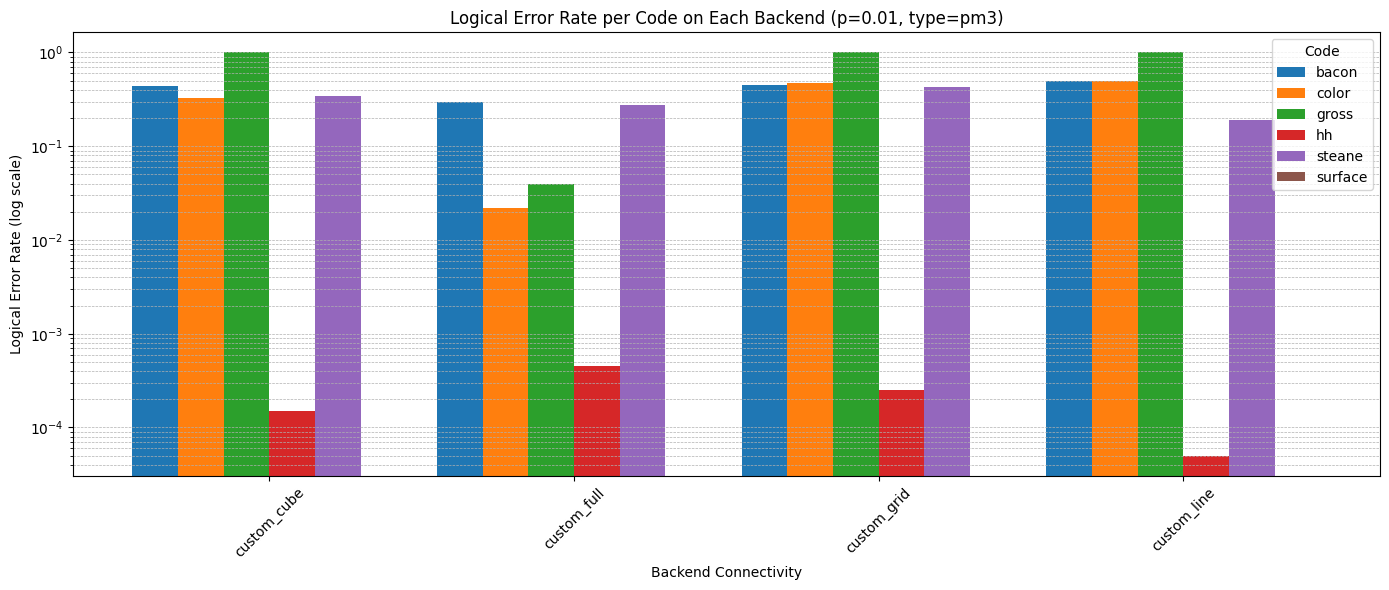

In [22]:
import matplotlib.pyplot as plt
import numpy as np

# Filter for pm3 at p = 0.01
p = 0.01
et = 'pm3'
subset = df1[(df1['error_probability'] == p) & (df1['error_type'] == et)]

# Handle duplicates using pivot_table
pivot_df = subset.pivot_table(index='backend', columns='code', values='logical_error_rate', aggfunc='mean')

# Prepare plot data
backends = pivot_df.index
codes = pivot_df.columns
x = np.arange(len(backends))
width = 0.15

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

for i, code in enumerate(codes):
    ax.bar(x + i * width, pivot_df[code], width, label=code)

# Formatting
ax.set_yscale('log')  # Set log scale on y-axis
ax.set_xlabel('Backend Connectivity')
ax.set_ylabel('Logical Error Rate (log scale)')
ax.set_title(f'Logical Error Rate per Code on Each Backend (p={p}, type={et})')
ax.set_xticks(x + width * (len(codes) - 1) / 2)
ax.set_xticklabels(backends, rotation=45)
ax.legend(title='Code')
ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5)

plt.tight_layout()
plt.savefig("../data/Topology_connectivity/barplot_pm3_log.png")
plt.show()
